
Optimized Routes and Distances:
Route from sao paulo (SP) to barra (BA): ['sao paulo (SP)', 'barra (BA)'] with Distance: 443 km
Route from santo andre (SP) to belo horizonte (MG): ['santo andre (SP)', 'belo horizonte (MG)'] with Distance: 134 km
Route from itatiba (SP) to juiz de fora (MG): ['itatiba (SP)', 'juiz de fora (MG)'] with Distance: 461 km
Route from campo largo (PR) to salvador (BA): ['campo largo (PR)', 'salvador (BA)'] with Distance: 61 km
Route from toledo (PR) to rio de janeiro (RJ): ['toledo (PR)', 'rio de janeiro (RJ)'] with Distance: 268 km
Route from campo limpo paulista (SP) to marechal candido rondon (PR): ['campo limpo paulista (SP)', 'marechal candido rondon (PR)'] with Distance: 337 km
Route from sao luis (MA) to cachoeirinha (RS): ['sao luis (MA)', 'cachoeirinha (RS)'] with Distance: 307 km
Route from americana (SP) to londrina (PR): ['americana (SP)', 'londrina (PR)'] with Distance: 358 km
Route from porto alegre (RS) to florianopolis (SC): ['porto alegre (RS

C:\Users\venka\AppData\Local\Temp\ipykernel_4192\3927708278.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


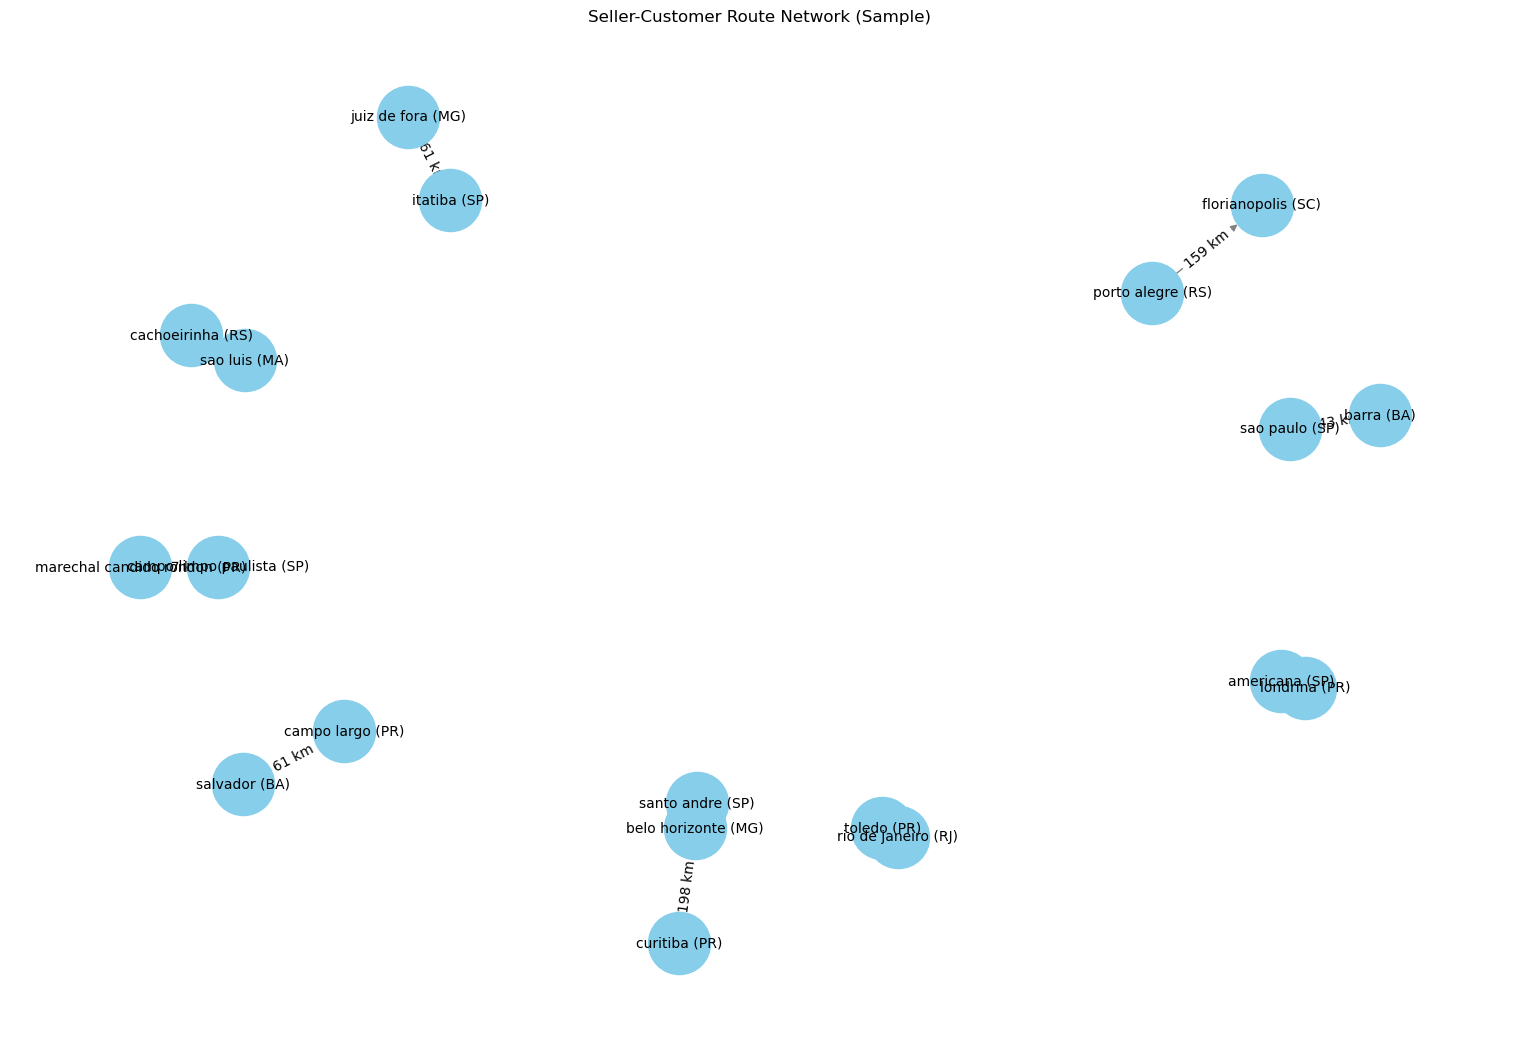

In [48]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load dataset
#file_path = r'C:\Users\venka\Downloads\DTDC Dilip\Dataset\sample_10000_Dataset' # Adjust path if needed
df = pd.read_csv(r'C:\Users\venka\Downloads\DTDC Dilip\Dataset\sample_10000_Dataset.csv')

# Select relevant columns
df_cleaned = df[[
    'order_id', 'customer_city', 'customer_state', 'seller_city', 'seller_state',
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
    'freight_value', 'price',
    'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']]

# Drop NA values
df_cleaned = df_cleaned.dropna()

# Sample top 10 orders
sample_df = df_cleaned.head(10)

# Create a directed graph
G = nx.DiGraph()

# Add edges with simulated distances
distance_lookup = {}
for idx, row in sample_df.iterrows():
    seller = f"{row['seller_city']} ({row['seller_state']})"
    customer = f"{row['customer_city']} ({row['customer_state']})"
    distance = random.randint(50, 500)  # Simulate distance in km
    distance_lookup[(seller, customer)] = distance
    G.add_edge(seller, customer, weight=distance, cost=row['freight_value'])

# Calculate shortest paths
routes = []
for source, target in zip(sample_df['seller_city'], sample_df['customer_city']):
    source_node = f"{source} ({sample_df[sample_df['seller_city'] == source]['seller_state'].iloc[0]})"
    target_node = f"{target} ({sample_df[sample_df['customer_city'] == target]['customer_state'].iloc[0]})"
    try:
        path = nx.shortest_path(G, source=source_node, target=target_node, weight='weight')
        dist = nx.shortest_path_length(G, source=source_node, target=target_node, weight='weight')
        routes.append((source_node, target_node, path, dist))
    except nx.NetworkXNoPath:
        routes.append((source_node, target_node, ["No path found"], 0))

# Display results
print("\nOptimized Routes and Distances:")
for r in routes:
    print(f"Route from {r[0]} to {r[1]}: {r[2]} with Distance: {r[3]} km")

# Visualize the network
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, edge_color='gray')
edge_labels = {(u, v): f"{d['weight']} km" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Seller-Customer Route Network (Sample)")
plt.axis('off')
plt.tight_layout()
plt.show()